# LESSON 4.9

## 00. Importing libraries and dataset

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Create path
path = r'/Users/Dulce/12-2023 Instacart Basket Analysis'

In [5]:
# Import ords_prods_custs
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs.pkl'))

In [6]:
# Create a color palette with distinct colors
colors = ['#FFB6C1', '#FF89AA', '#FF2F7B', '#FF6B9A']

In [5]:
ords_prods_custs.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,quantity,orders_day_of_week,...,frequency_flag,First Name,Last Name,Gender,State,Age,Children,Marital_Status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,...,Frequent customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Frequent customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,1,married,49620,both


## 01. Creating Bar Charts

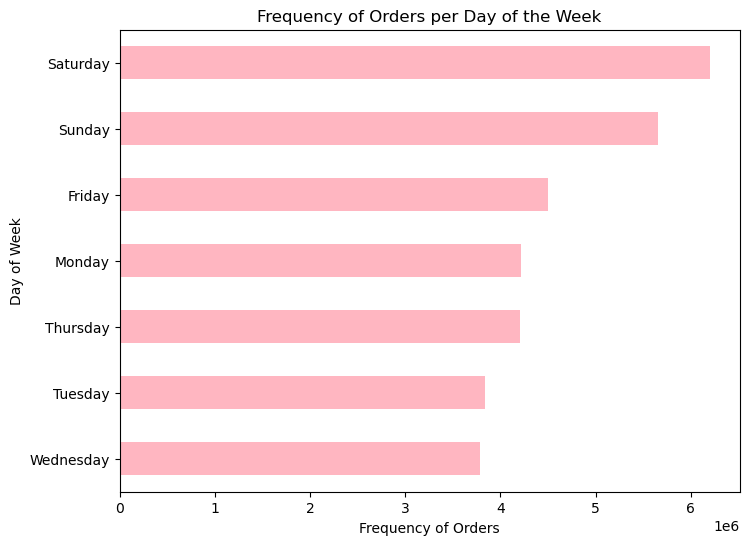

In [7]:
# Map numerical values to names of the days
ords_prods_custs['orders_day_of_week'] = ords_prods_custs['orders_day_of_week'].map({0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'})

# Calculate the frequency of orders per day of the week and create a horizontal bar plot
bar_dow = ords_prods_custs['orders_day_of_week'].value_counts().sort_values(ascending=True).plot.barh(color=colors[0], figsize=(8, 6))

# Adding labels for the X and Y axes
plt.xlabel('Frequency of Orders')
plt.ylabel('Day of Week')

# Adding a title
plt.title('Frequency of Orders per Day of the Week')

# Show the plot
plt.show()

In [8]:
# Export Bar Chart
bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow.png'))

## 02. Creating Histograms & Scatterplot

<Axes: ylabel='Frequency'>

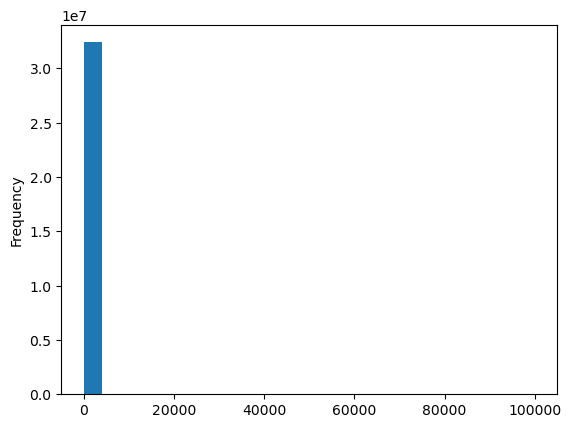

In [8]:
# Create Histograms for prices
ords_prods_custs['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

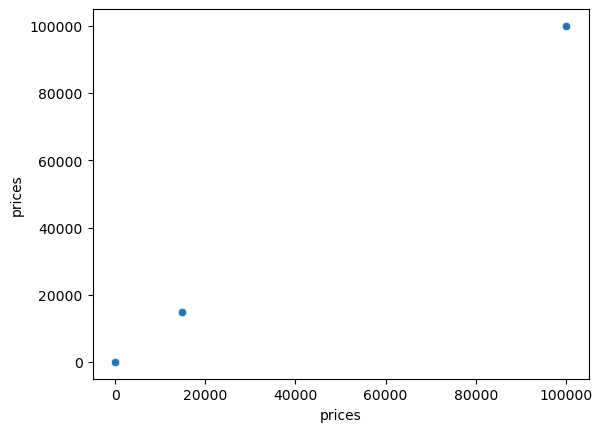

In [9]:
# Create scatterplot to analyze outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_custs)

In [10]:
# Set outlier criteria "price > 100 = outlier"
ords_prods_custs.loc[ords_prods_custs['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,quantity,orders_day_of_week,...,frequency_flag,First Name,Last Name,Gender,State,Age,Children,Marital_Status,income,_merge
23024,33664,2 % Reduced Fat Milk,84,16,99999.0,1489110,43360,prior,3,Sunday,...,Frequent customer,Marilyn,Baker,Female,Florida,67,3,married,149199,both
23025,33664,2 % Reduced Fat Milk,84,16,99999.0,2322035,43360,prior,4,Sunday,...,Frequent customer,Marilyn,Baker,Female,Florida,67,3,married,149199,both
23026,33664,2 % Reduced Fat Milk,84,16,99999.0,420339,43360,prior,5,Sunday,...,Frequent customer,Marilyn,Baker,Female,Florida,67,3,married,149199,both
23027,33664,2 % Reduced Fat Milk,84,16,99999.0,2912515,43360,prior,7,Monday,...,Frequent customer,Marilyn,Baker,Female,Florida,67,3,married,149199,both
28712,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,518829,54136,prior,22,Sunday,...,Regular customer,Benjamin,Parsons,Male,New Jersey,40,0,single,160524,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32383871,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3288900,136909,prior,1,Thursday,...,Frequent customer,Deborah,Dillon,Female,New Jersey,30,2,married,161606,both
32383872,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,285306,136909,prior,4,Sunday,...,Frequent customer,Deborah,Dillon,Female,New Jersey,30,2,married,161606,both
32383873,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2744314,136909,prior,13,Friday,...,Frequent customer,Deborah,Dillon,Female,New Jersey,30,2,married,161606,both
32396750,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2716179,2700,prior,7,Monday,...,Frequent customer,Charles,Crosby,Male,Washington,67,0,divorced/widowed,225873,both


In [11]:
# Mark outliers as Missing
ords_prods_custs.loc[ords_prods_custs['prices'] >100, 'prices'] = np.nan

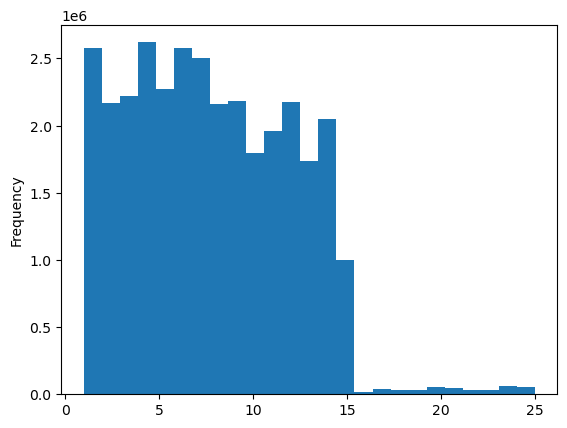

In [12]:
# Redo Histograms for prices (without outliers)
hist_prices = ords_prods_custs['prices'].plot.hist(bins = 25)

In [13]:
# Export Histogram
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## 03. Creating Line Charts -- Sample Data 70/30

In [9]:
# Create a list holding True/False values to the test np.random.rand()<= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs)) <= 0.7

In [10]:
# Split your dev: Store 70% within Big-Dataframe and 30% within Small-Dataframe
big = ords_prods_custs[dev]
small = ords_prods_custs[~dev]

In [13]:
# Reducing your samples to only those columns necessary for the chart
small_dow_reduced = small[['prices','orders_day_of_week']]
big_dow_reduced = big[['prices','orders_day_of_week']]

/Users/Dulce/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Dulce/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


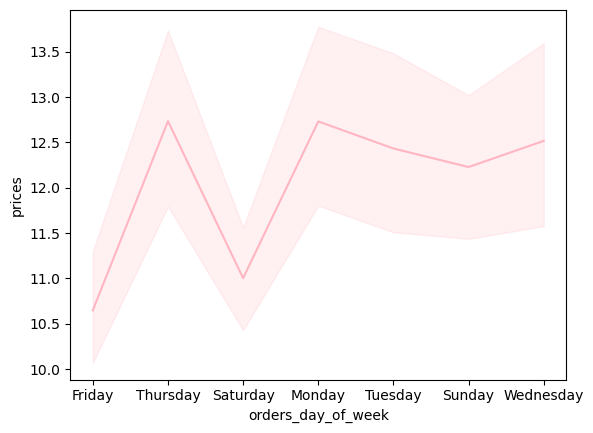

In [14]:
# Create the Line Chart with Small_reduced
line_dow_prices = sns.lineplot(data=small_dow_reduced, x='orders_day_of_week', y='prices', color=colors[0])

In [17]:
# Export Line Chart
line_dow_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices.png'))

# TASK 4.9 - Part 2

## 3. Histogram of the “order_hour_of_day”

Text(0.5, 0, 'Hour of Day')

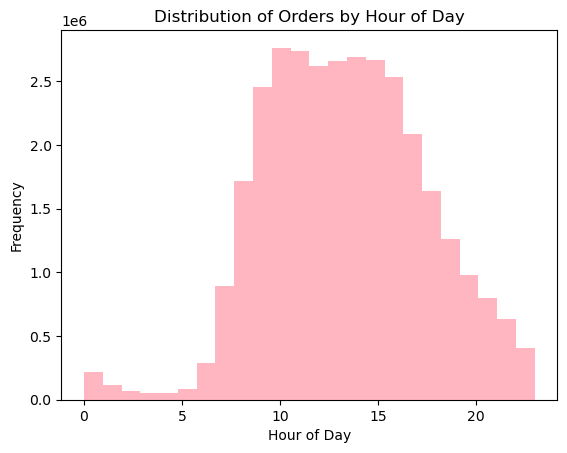

In [15]:
# Create Histograms for order_hour_of_day
hist_hours = ords_prods_custs['order_hour_of_day'].plot.hist(bins = 24, color = colors[0])
#Add title
plt.title('Distribution of Orders by Hour of Day')
# Add title to axis X
plt.xlabel('Hour of Day')

In [17]:
# Export Histogram
hist_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hours.png'))

ANSWER 3: Histograms are used to show the density of a continuous variable (in this case, hours of the day). We can see a low frequency during night (from 00am to 07am). It is normal because the most of the people are sleeping by that time. As the morning starts, the frequency is increasing. Also we see the later it is, the lower is the frequency. A important point to mention is the lack of frequency for 12 oclock. It seems the frenquency of having data for this hour is zero. Probably, it is a problem with the definition of the time am, pm. We should check deeper.Tu sum up:
- Peak hours for order is between 10am - 4pm
- Most orders are made at 10am, 11am and 2pm
- Off peak hours (minimum orders) are between 12am to 5am.

## 4. Bar chart from the “loyalty_flag”

In [ ]:
# Check frequency of Loyalty Flag
loyalty_counts = ords_prods_custs['loyalty_flag'].value_counts(dropna = False)
# Calculate percentages
loyalty_percentages = (loyalty_counts / len(ords_prods_custs) * 100).round(0).astype(str) + '%'
loyalty_percentages

Text(0.5, 0, 'Loyalty Type')

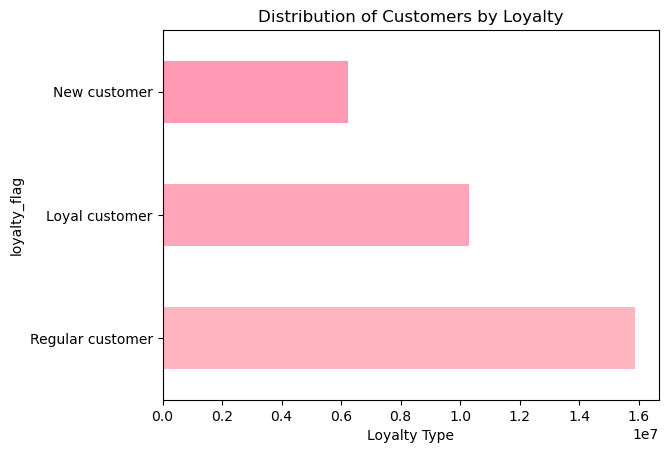

In [20]:
# Create Bar Chart for orders_day_of_week
bar_loyalty = ords_prods_custs['loyalty_flag'].value_counts().plot(kind='barh', color=colors)
#Add title
plt.title('Distribution of Customers by Loyalty')
# Add title to axis X
plt.xlabel('Loyalty Type')

In [21]:
# Export Bar Chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

ANSWER 4: 
- Regular customers made most orders
- New customers made the least orders

## 5. Line Chart: Relation between “prices” and "hour of the day"

In [22]:
# Reducing your samples to only those columns necessary for the chart
small_hours_reduced = small[['order_hour_of_day','prices']]
big_hours_reduced = big[['order_hour_of_day','prices']]

/Users/Dulce/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Dulce/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Expenditure')

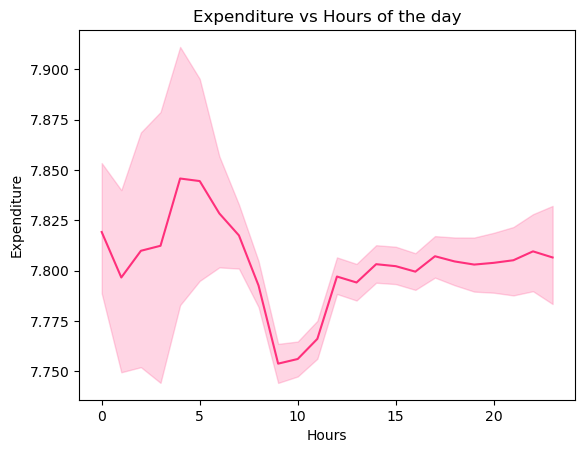

In [23]:
# Create the Line Chart with Small_reduced
line_hours_prices = sns.lineplot(data = small_hours_reduced, x = 'order_hour_of_day',y = 'prices', color=colors)
#Add title
plt.title('Expenditure vs Hours of the day')
# Add title to axis X
plt.xlabel('Hours')
# Add title to axis Y
plt.ylabel('Expenditure')

In [24]:
# Export Line Chart
line_hours_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hours_prices.png'))

ANSWER 5: 
- Expenses are highest at 4am. Probably because they are spontaneous orders
- Overall expenses are higher betwwen 10pm and 7am, with peaks at 10pm, 1am, 4am and 7am
- Error bands are quite wide from 00 to 7am, that means that the probability of a value would fall within the area of the error bands is higher as we could want. Probably because the frequency of the orders during those hours is low, as we saw previously.

## 6. Line Chart: Connections between age and number of dependents

In [25]:
# Reducing your samples to only those columns necessary for the chart
small_age_children_reduced = small[['Age','Children']]
big_age_children_reduced = big[['Age','Children']]

/Users/Dulce/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Dulce/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of Dependances')

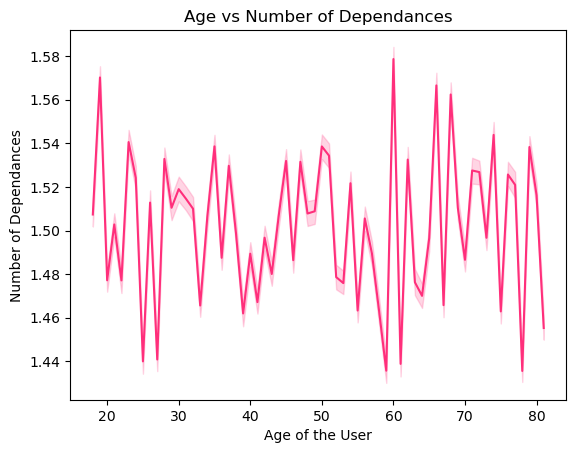

In [26]:
# Create the Line Chart with Small_reduced
line_age_children = sns.lineplot(data = small_age_children_reduced, x = 'Age',y = 'Children', color=colors)
#Add title
plt.title('Age vs Number of Dependances')
# Add title to axis X
plt.xlabel('Age of the User')
# Add title to axis Y
plt.ylabel('Number of Dependances')

In [27]:
# Export Line Chart
line_age_children.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_children.png'))

ANSWER 6: I dont see any relationship between the age and the number of childrens. 

## 7. Scatterplot: Connections between age and income

Text(0, 0.5, 'Income of the User')

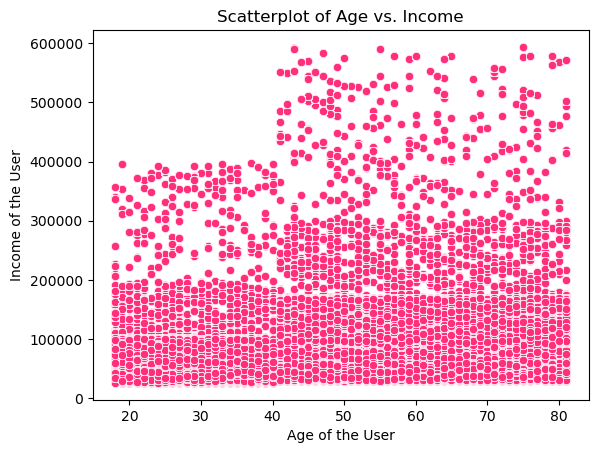

In [28]:
# Create scatterplot to analyze outliers
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_custs, color=colors)
#Add title
plt.title('Scatterplot of Age vs. Income')
# Add title to axis X
plt.xlabel('Age of the User')
# Add title to axis Y
plt.ylabel('Income of the User')

In [29]:
# Export Scatterplot
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

ANSWER 7: 
- The most of customers have less than 200.000
- Ages between 18 to 40 have lower spending power compared to above 40, when the incomes increase.
- Customers between 18 and 40 have income less than 400.000. 
- Customers above 40 surpass 400,000 and earn upto 600.000